# Heart Disease Classification w/ Logistic Regression

In the united states, heart disease is the leading cause of death for men and women, regardless of racial or ethnic group. 

One person dies every 33 seconds from heart disease (aka cardiovascular disease), and between 2018 to 2019 heart disease cost the United States about 239.9 billion dollars as well as in 2021 taking roughly 695,000 lives. 

This notebook will explore the dataset, [Cardiovascular Diseases Risk Prediction Dataset](https://www.kaggle.com/datasets/alphiree/cardiovascular-diseases-risk-prediction-dataset), grabbed from kaggle. Originally this dataset comes from the BFRSS which is the following: "The Behavioral Risk Factor Surveillance System (BRFSS) is the nation’s premier system of health-related telephone surveys that collect state data about U.S. residents regarding their health-related risk behaviors, chronic health conditions, and use of preventive services." 

19 variables were handpicked from the larger dataset to create the current dataset I am using now, and in this dataset I will explore some of the key factors that contribute to a person that is at risk of heart disease and build a prediction model using logistic regression, training data, and testing data, to see if it can accurately predict what patients have heart disease based on symptoms alone

# Data Processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Importing data using pandas read_csv method
data = pd.read_csv('/kaggle/input/cardiovascular-diseases-risk-prediction-dataset/CVD_cleaned.csv')

# Exploratory Analysis of the Data

In [3]:
data.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [4]:
data.shape

(308854, 19)

In [5]:
data.head(5)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [6]:
#Printing unique values for select columns that may not contain binary values ('yes or no')
print(data['Checkup'].unique())
print('')
print(data['General_Health'].unique())
print('')
print(data['Diabetes'].unique())
print('')
print(data['Age_Category'].unique())

['Within the past 2 years' 'Within the past year' '5 or more years ago'
 'Within the past 5 years' 'Never']

['Poor' 'Very Good' 'Good' 'Fair' 'Excellent']

['No' 'Yes' 'No, pre-diabetes or borderline diabetes'
 'Yes, but female told only during pregnancy']

['70-74' '60-64' '75-79' '80+' '65-69' '50-54' '45-49' '18-24' '30-34'
 '55-59' '35-39' '40-44' '25-29']


In [7]:
data.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [8]:
a = len(data['Heart_Disease'][data['Heart_Disease']=='Yes'])
b = len(data['Heart_Disease'][data['Heart_Disease']=='No'])
print('Number of people with heart disease:',a)
print('Number of people without heart disease:',b)

print('Ratio of Heart_Disease + / Heart_Disease -:',a/b)

Number of people with heart disease: 24971
Number of people without heart disease: 283883
Ratio of Heart_Disease + / Heart_Disease -: 0.08796229432547915


In [9]:
#Chaging strings to integers for classification later on. 
#Also allows for me to correlate numerical values later on down the line as well
data = data.replace({'No':0,'Yes':1})

data = data.replace({'Within the past 2 years':2, 'Within the past year':1,
       '5 or more years ago':4, 'Within the past 5 years':3, 'Never':0})

data = data.replace({'Poor':0, 'Very Good':3, 'Good':2, 'Fair':1, 'Excellent':4})

data = data.replace({'Male':1,'Female':2})

data = data.replace({'70-74':10, '60-64':8, '75-79':11, '80+':12, '65-69':9, '50-54':6, '45-49':5, '18-24':0, '30-34':2,
 '55-59':7, '35-39':3, '40-44':4, '25-29':1,})

data = data.replace({'No':0, 'Yes':3, 'No, pre-diabetes or borderline diabetes':1,
 'Yes, but female told only during pregnancy':2})

In [10]:
#Pulling the correlation of the columns in relation to heart disease
#Columns with the highest correlation are Arthritis and Smoking_History
data.corr().Heart_Disease

General_Health                 -0.232503
Checkup                        -0.084887
Exercise                       -0.096347
Heart_Disease                   1.000000
Skin_Cancer                     0.090848
Other_Cancer                    0.092387
Depression                      0.032526
Diabetes                        0.153286
Arthritis                       0.153913
Sex                            -0.072595
Age_Category                    0.229011
Height_(cm)                     0.015780
Weight_(kg)                     0.045875
BMI                             0.042666
Smoking_History                 0.107797
Alcohol_Consumption            -0.036569
Fruit_Consumption              -0.020055
Green_Vegetables_Consumption   -0.024043
FriedPotato_Consumption        -0.009227
Name: Heart_Disease, dtype: float64

# General Data Visualizations

Text(0, 0.5, 'BMI')

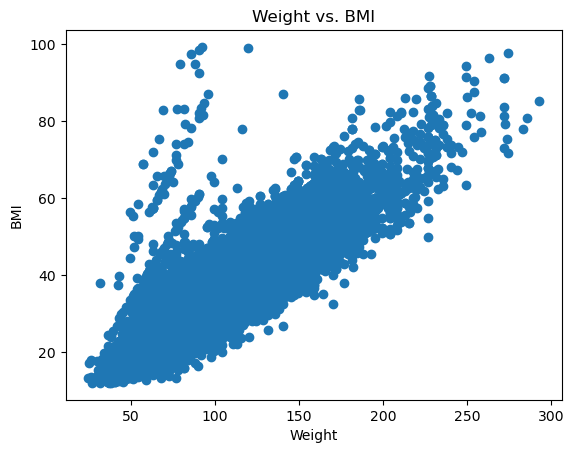

In [11]:
#Weight vs. BMI
plt.scatter(data['Weight_(kg)'],data['BMI'])
plt.title('Weight vs. BMI')
plt.xlabel('Weight')
plt.ylabel('BMI')

Text(0.5, 1.0, 'BMI vs. Green_Vegetables_Consumption')

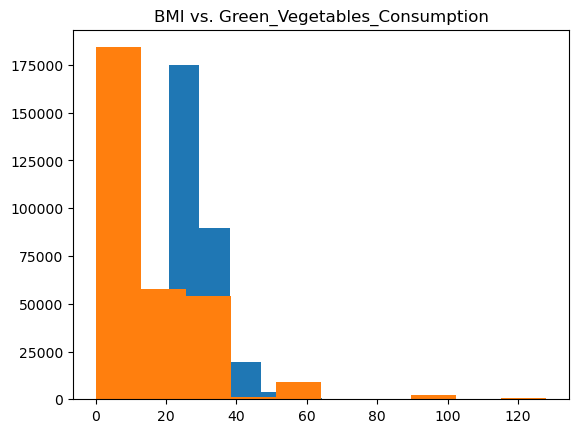

In [12]:
plt.hist(data['BMI'])
plt.hist(data['Green_Vegetables_Consumption'])
plt.title('BMI vs. Green_Vegetables_Consumption')

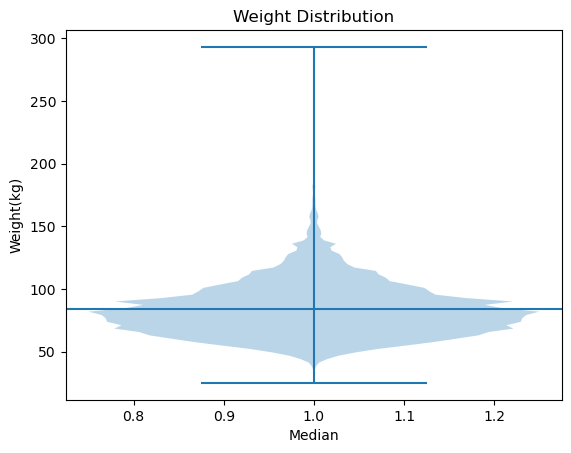

In [13]:
plt.violinplot(data['Weight_(kg)'])
plt.title('Weight Distribution')
plt.xlabel('Median')
plt.ylabel('Weight(kg)')
plt.axhline(np.mean(data['Weight_(kg)']))

# The Logistic Equation

The equation for logistic regression is as follows:

$$ f(x) = \frac{e^{x}} {1+e^{x} }  \equiv \frac{1}{1+e^{-x} } $$

Using python and the scikit-learn toolkit, I will be applying the data to this equation in relation to heart disease

[Equation Source](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSWwm2ae6WBzbiiAMMpnjArlMDMpBxOVJNZbpNJq1qf6yNZxx5BoEsQ8S7NQLtGCwwx5RQ&usqp=CAU)


# Creating a Logistic Regression Model 

In [14]:
#Features
X = data.drop(['Heart_Disease'],axis=1)

#Labels
y = data['Heart_Disease']

#Splitting the data into training and testing; 70% Training, 30% Testing
#80-20 split yields worse results
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=.3,train_size=.7,random_state=12)

#Creating a Logistic Regression Object; Setting max_iter=20000 to let algorithm converge
log_model = LogisticRegression(max_iter=20000)

#Fitting the training data to a logistic model
log_model.fit(x_train,y_train)

#Training the log model on the x_test data
y_pred = log_model.predict(x_test)

#Printing the score of the fitted log_model on testing data
print("Logistic Model Score on Testing Data:",log_model.score(x_test,y_test))

#Printing the score of the fitted log_model on testing data
print("Logistic Model Score on Testing Data:",log_model.score(x_test,y_test))

#Returning the accuracy of the model on the training and the testing data
lmstr = log_model.score(x_train,y_train)
lmste = log_model.score(x_test,y_test)

Logistic Model Score on Testing Data: 0.9186353972176954
Logistic Model Score on Testing Data: 0.9186353972176954


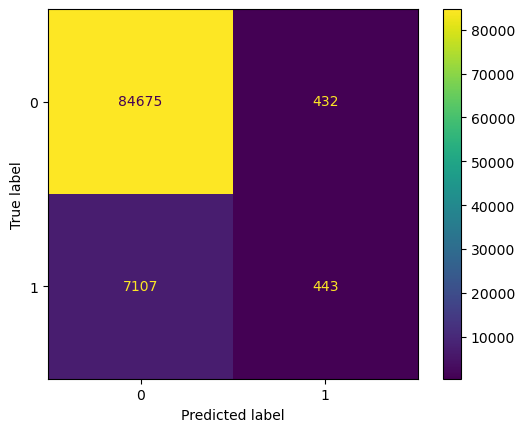

In [15]:
#Creating a confusion matrix; 
#True Neg == Top left, True Pos == Bottom Right
#False Neg == Bottom Left, False Pos == Top Right
confusion_matrix = sklearn.metrics.confusion_matrix(y_test,y_pred)
sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix).plot()

In [16]:
lm_coefs = pd.DataFrame({"Coefs":log_model.coef_[:][0],"Column Names":x_train.columns})
print('Intercept:',log_model.intercept_)
lm_coefs

Intercept: [-0.02042768]


,Coefs,Column Names
0,-0.587582,General_Health
1,-0.202397,Checkup
2,-0.028162,Exercise
3,0.104623,Skin_Cancer
4,0.056940,Other_Cancer
5,0.240472,Depression
6,0.438321,Diabetes
7,0.261473,Arthritis
8,-0.887953,Sex
9,0.277425,Age_Category


The coefficients from this data tell us the following:

(1) Skin_cancer, Other_Cancer, Arthritis, Height, Weight, and smoking have a positive correlation to Heart Disease

(2) General_health, number of checkups, exercise, depression, BMI, Alcohol_Consumption, Fruit Consumption, Green Vegetable Consumption, and Fried Potato Consumption are negatively correlated with a risk of Heart Disease

As heart disease increases, all the categories in (1) tend to increase over time while (2) decrease over time

The largest correlation in having Heart_Disease seems to be having Diabetes

# Model Optimization using the most correlated Coefficients

In my model, all of the coefficients are relatively small. Despite this, in hopes of making my model more accurate and efficient I've made a second model below to see if there are any improvements in my new model using any feature from the first model that had a coefficient value of .2 or above

In [17]:
#Features
X = data[['Arthritis','Smoking_History','Age_Category','Diabetes','Depression']]

#Labels
y = data['Heart_Disease']

#Splitting the data into training and testing; 70% Training, 30% Testing
#80-20 yielded worse results
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=.3,train_size=.7,random_state=12)

#Creating a Logistic Regression Object
log_model_2 = LogisticRegression(max_iter=20000)

#Fitting the training data to a logistic model
log_model_2.fit(x_train,y_train)

#Training the log model on the x_test data
y_pred_2 = log_model_2.predict(x_test)

#printing the score(error) of the fitted log_model
print("Logistic Model Score on Training Data:",log_model_2.score(x_train,y_train))

#Printing the score of the fitted log_model on testing data
print("Logistic Model Score on Testing Data:",log_model_2.score(x_test,y_test))

lmstr_2 = log_model_2.score(x_train,y_train)
lmste_2 = log_model_2.score(x_test,y_test)

Logistic Model Score on Training Data: 0.9192079446060769
Logistic Model Score on Testing Data: 0.9182360749862396


In [18]:
lm_coefs_2 = pd.DataFrame({"Coefs":log_model_2.coef_[:][0],"Column Names":x_train.columns})
print('Intercept:',log_model.intercept_)
lm_coefs_2

Intercept: [-0.02042768]


,Coefs,Column Names
0,0.419048,Arthritis
1,0.580445,Smoking_History
2,0.291433,Age_Category
3,0.764459,Diabetes
4,0.380822,Depression


In [19]:
#Model 2 performs ever so slightly worse than our original model
print(lmstr_2 - lmstr)
print(lmste_2 - lmste)

#Subtracting the training and testing scores from model 2 by model 1, yield a negative number. 
#This denotes that model 1 had higher accuracies for both training and testing data

-0.00038853453100640145
-0.0003993222314557787


Dropping the additional columns outside of coefficient values less than .2 changed the score of the model by a very small amount for the training data and the testing data. This tells me that the removed columns, while still impacting the model ever so slightly, do not bear a noticable impact in the overall score of the model.

Scores alone don't tell the whole truth however

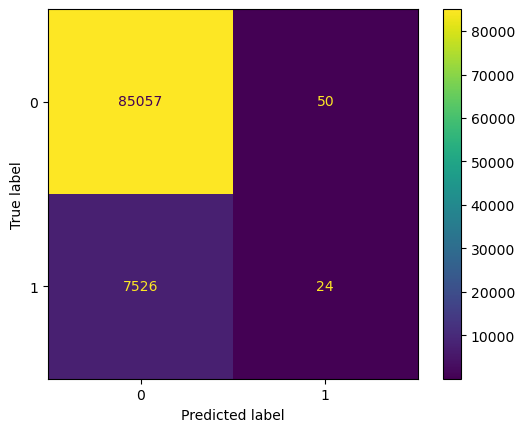

In [20]:
confusion_matrix = sklearn.metrics.confusion_matrix(y_test,y_pred_2)
sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix).plot()

Viewing the confusion_matrix of the second model reveals the fact that not only is the second model slightly worse, score wise, but that the second model also has a higher number of false negatives than the first. Alongside that,the second model misclassifies almost all of the afflicted patients as not having heart disease when they actually do (which is both wrong and dangerous)

So while the other columns are not hugely impactful as far as score goes, the additional columns do allow the model to have more accurate predictions

# Calculating RMSE of both models

RMSE is a metric used to calculate how close the estimates are to their actual values. The lower our RMSE value, the more accurate our model is. While I did use the built-in score function above, to further validate my model I'd still like to use RMSE as an additional metric of proof.

[Equation for MSE](https://www.google.com/search?q=equation+for+mse&sca_esv=559462882&sxsrf=AB5stBhqlamis411rBu30I1uP05aKJKH5Q%3A1692815957516&ei=VVLmZOaEH-qKptQPpaq0qAY&ved=0ahUKEwimg8XutvOAAxVqhYkEHSUVDWUQ4dUDCBA&uact=5&oq=equation+for+mse&gs_lp=Egxnd3Mtd2l6LXNlcnAiEGVxdWF0aW9uIGZvciBtc2UyBRAAGIAEMggQABgWGB4YCjIGEAAYFhgeMgsQABgWGB4Y8QQYCjILEAAYFhgeGPEEGAoyCBAAGBYYHhgPMggQABgWGB4YDzIIEAAYFhgeGA8yCBAAGBYYHhgPMggQABiKBRiGA0j0FVAAWPQUcAF4AZABApgBzQGgAZkNqgEFNy43LjG4AQPIAQD4AQGoAhTCAgcQIxjqAhgnwgIWEAAYAxiPARjqAhi0AhiMAxjlAtgBAcICFhAuGAMYjwEY6gIYtAIYjAMY5QLYAQHCAgcQIxiKBRgnwgIEECMYJ8ICCBAAGIoFGJECwgIREC4YgAQYsQMYgwEYxwEY0QPCAgsQABiABBixAxiDAcICExAuGIoFGLEDGIMBGMcBGNEDGEPCAgsQLhiABBixAxiDAcICBxAAGIoFGEPCAg0QABiKBRixAxiDARhDwgIKEAAYigUYsQMYQ8ICCBAAGIAEGLED4gMEGAAgQYgGAboGBggBEAEYCw&sclient=gws-wiz-serp)

In [21]:
mse_1 = sklearn.metrics.mean_squared_error(y_test,y_pred)
mse_2 = sklearn.metrics.mean_squared_error(y_test,y_pred_2)
print("Model 1 RMSE:",np.sqrt(mse_1),"Model 2 RMSE:",np.sqrt(mse_2))
print("Model with the lowest RMSE:", min(np.sqrt(mse_1),np.sqrt(mse_2)))

Model 1 RMSE: 0.2852448120164583 Model 2 RMSE: 0.28594391935091124
Model with the lowest RMSE: 0.2852448120164583


As expected, model 1 has a lower RMSE than the second model

# Visualization of Coefficient Rates from Model 1

To visualize the various coefficient rates in relation to heart disease, I am going to plot all of the rates against one another using the logistic regression function and matplotlib

Text(0, 0.5, 'Coefficient Rates')

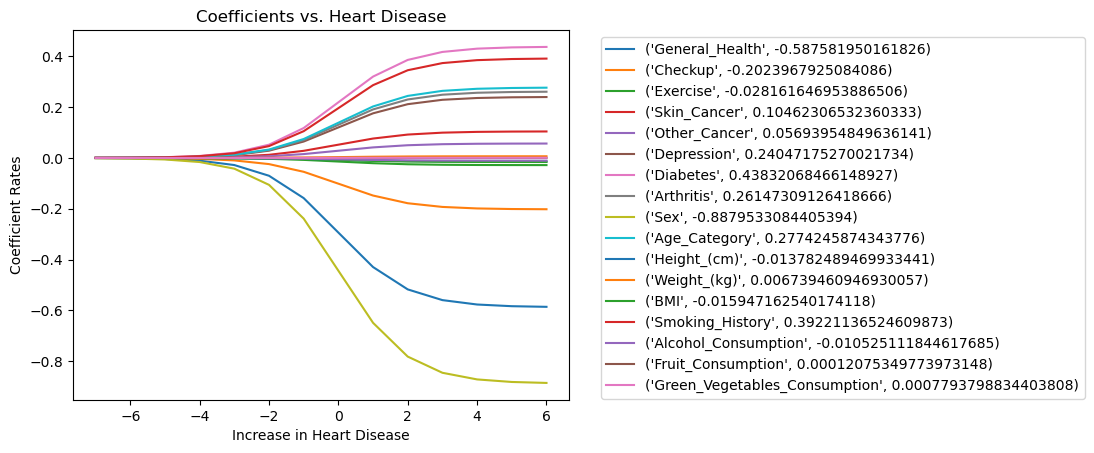

In [22]:
func = np.arange(-7,7,1)
equ = (np.exp(func))/(1 + np.exp(func))

for i in range(len(lm_coefs)-1):
    coef = lm_coefs.iloc[i][0]
    rate = coef * equ
    plt.plot(func,rate,label=(lm_coefs.iloc[i][1],lm_coefs.iloc[i][0]))
    
#source = https://www.freecodecamp.org/news/matplotlib-figure-size-change-plot-size-in-python/ 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Coefficients vs. Heart Disease')
plt.xlabel('Increase in Heart Disease')
plt.ylabel('Coefficient Rates')

# Conclusions

1) The top contributing factors to heart disease are having a smoking history, coupled with diabetes

2) Both models created had an accuracy of around 91-ish percent, however model one performed slightly better by small decimal amounts.

3) Model 1 was able to correctly predict almost 400 more patients who had heart disease than model 2, despite model 2 using only the most relevant coefficients

4) Model 2 had a higher False-Negative rate but a lower False-Positive rate while Model 1 had a lower False-Negative rate but a higher False-Positive rate

# Contact Me:

If you have any questions or comments, feel free to reach out to me on the following:

* [LinkedIn](https://www.linkedin.com/in/jimmy-gray-jones-059450260/)
* [Email](jimmyjones0119@gmail.com)